In [1]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define dataset directory
data_dir = 'data_dir'  # Ensure this is the correct relative path to your 'data_dir'

# Initialize lists for data and labels
images = []
labels = []

# Loop through each digit folder (only for digits 0 and 1)
for label in [0, 1]:  # 0 for zeros_dir, 1 for ones_dir
    label_dir = os.path.join(data_dir, 'train_dir', f'{label}s_dir')  # Adjust this according to your folder structure
    print(f"Looking for images in: {label_dir}")  # Print directory being processed
    if not os.path.exists(label_dir):
        print(f"Warning: Directory {label_dir} does not exist!")
        continue

    for img_name in os.listdir(label_dir):
        # Skip non-image files (e.g., .DS_Store, .txt, etc.)
        if img_name.startswith('.') or not img_name.lower().endswith(('png', 'jpg', 'jpeg', 'bmp')):
            continue
        
        # Load image
        img_path = os.path.join(label_dir, img_name)
        try:
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((28, 28))  # Resize to fixed size
            img_array = np.array(img)  # Convert to array

            # Append image and label
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Could not load image {img_path}: {e}")

# Convert images and labels to numpy arrays
X = np.array(images)
y = np.array(labels)
print(y)

# Check if images were loaded
print(f"Total images loaded: {len(X)}")

# If no images are loaded, raise an exception
if len(X) == 0:
    raise ValueError("No images were loaded. Check your dataset folder paths and contents.")

# Normalize the images (0-255 -> 0-1)
X = X / 255.0

# Flatten the images to 1D arrays (784,)
X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

# One-hot encode the labels
# y = to_categorical(y, 2)  # Only two classes: 0 and 1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} images")
print(f"Test set size: {X_test.shape[0]} images")

Looking for images in: data_dir/train_dir/0s_dir
Looking for images in: data_dir/train_dir/1s_dir
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Total images loaded: 22


NameError: name 'X_train' is not defined

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# Build the model
# model = Sequential()
# model.add(Dense(256, input_shape=(784,), activation='relu'))  # First hidden layer
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))  # Second hidden layer
# model.add(Dropout(0.3))
# model.add(Dense(2, activation='sigmoid'))  # Output layer (2 classes: 0 or 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.4706 - loss: 0.6957
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5294 - loss: 0.6893
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5882 - loss: 0.6933
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5882 - loss: 0.6955
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5294 - loss: 0.6854
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5882 - loss: 0.6800
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6471 - loss: 0.6753
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4118 - loss: 0.7125
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5294 - loss: 0.6950
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5882 - loss: 0.6909
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5882 - loss: 0.6962
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6471 - l

In [198]:
def predict_single_image(img_path):
    # Preprocess the image
    img = Image.open(img_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = img_array.reshape(-1, 28, 28, 1)

    # Predict
    prediction = model.predict(img_array)

    # Use a threshold to classify
    predicted_class = 1 if prediction[0] > 0.5 else 0
    return predicted_class

# Test with a new image (replace with your image path)
image_path = '/Users/sundarasubramanian/Downloads/IMG_4238.jpg'
predicted_label = predict_single_image(image_path)

print(f"Predicted Label: {predicted_label}")

image_path = '/Users/sundarasubramanian/Downloads/IMG_4240.jpg'
predicted_label = predict_single_image(image_path)

print(f"Predicted Label: {predicted_label}")

image_path = '/Users/sundarasubramanian/YoYo/CIS-583/HW2/data_dir/train_dir/0s_dir/1.jpg'
predicted_label = predict_single_image(image_path)

print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Label: 0


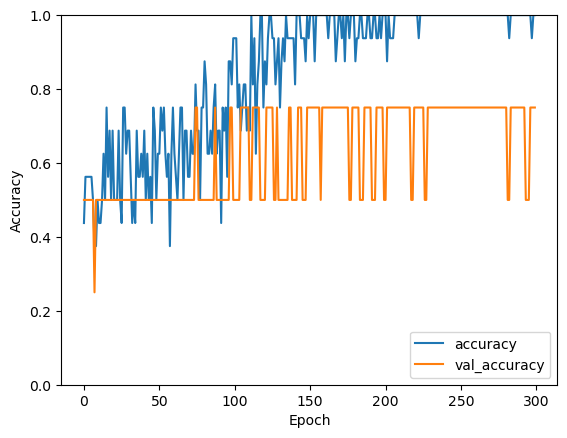

In [199]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()